https://stackoverflow.com/questions/77587951/how-to-fit-a-system-of-odes-with-interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize

In [2]:
def system(t, x, k0, k1, k2, p1, p2):
    return np.array([
        -k0 * x[0],
        p1 * x[0] - k1 * x[1],
        p2 * x[1] - k2 * x[2]
    ])

In [3]:
def solver(parameters, t=np.linspace(0, 1, 10), x0=np.ones(3)):
    solution = integrate.solve_ivp(system, [t.min(), t.max()], x0, args=parameters, t_eval=t)
    return solution.y

In [4]:
texp = np.linspace(0, 35, 15)
p0 = np.array([ 0.03693555,  0.38054633, -0.06252069,  1.41453107, -0.11159681])
x0 = np.array([0.24, 0.20, 0.89])

In [5]:
xexp = solver(p0, t=texp, x0=x0)

In [6]:
def residuals_factory(t, x):
    def wrapped(parameters):
        return 0.5 * np.sum(np.power(x - solver(parameters, t=t, x0=x[:, 0]), 2))
    return wrapped

In [7]:
residuals = residuals_factory(texp, xexp)
solution = optimize.minimize(residuals, x0=[1, 1, 1, 1, 1])

In [8]:
solution

      fun: 5.247366817507152e-09
 hess_inv: array([[ 6.03532397e-03, -8.04936083e-02, -2.32008871e-03,
        -1.97854768e-01, -2.80108715e-03],
       [-8.04936083e-02,  2.58074143e+00, -2.31316533e-01,
         8.10861536e+00, -2.54455733e-01],
       [-2.32008871e-03, -2.31316533e-01,  1.04349010e-01,
        -8.70018627e-01,  1.24470742e-01],
       [-1.97854768e-01,  8.10861536e+00, -8.70018627e-01,
         2.69328260e+01, -9.15934684e-01],
       [-2.80108715e-03, -2.54455733e-01,  1.24470742e-01,
        -9.15934684e-01,  1.52329340e-01]])
      jac: array([ 1.07748615e-04,  3.76131919e-05, -1.52174203e-04, -1.06723711e-05,
        1.25500074e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 900
      nit: 67
     njev: 148
   status: 2
  success: False
        x: array([ 0.03693634,  0.38060469, -0.06255412,  1.41474641, -0.11163762])

In [9]:
p0

array([ 0.03693555,  0.38054633, -0.06252069,  1.41453107, -0.11159681])

In [10]:
tlin = np.linspace(texp.min(), texp.max(), 200)
xhat = solver(solution.x, t=tlin, x0=x0)

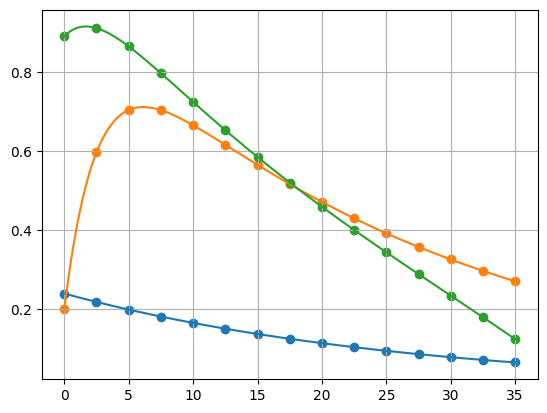

In [11]:
fig, axe = plt.subplots()
for i in range(xexp.shape[0]):
    axe.scatter(texp, xexp[i, :])
    axe.plot(tlin, xhat[i, :])
axe.grid()